# Introduction
Principal Component Analysis (PCA) is a dimensionality reduction technique used to simplify complex, high dimensional data. It excels at identifying the underlying structure of the data and capturing the most important information while reducing the number of features.

### Curse of dimensionality
- As the number of features or dimensions in the data increase, analyzing and visualizing it becomens increasingly challenging. This phenomenon is known as curse of dimensionality.
- Distance between data points becomes less meaningful, and traditional methods struggle to identify patterns in high-dimensional spaces.

### How does PCA tackle the problems in high-dimensional data?
PCA tackles this challenge by transforming the data into a lower dimensional space while preserving the most significant information. It achieves this by identifying a new set of features called principal components (PCs).

### How to find the most informative directions?
- Variance capture: Imagine the data as a cloud of points in a high-dimensional space. PCA identifies the direction (principal component) with the greatest spread (variance) in this cloud. This direction captures the most information about how the data points are distributed.
- Subsequent components: PCA then finds the next direction that explains the most remaining variance, perpendicular (uncorrelated) to the first one. This process continues until a desired number of principal components are identified.

### Benefits of using PCA
- Visualization: By reducing the dimensionality, PCA helps to visualize the data in lower dimensional space (e.g. 2D or 3D plots). This facilitates easier exploration, pattern identification, and data-driven decision making.
- Data compression: PCA reduces the storage requirements and transmission bandwidth needed for the data. This is particularly beneficial for large datasets.
- Faster machine learning: Training ML models often becomes significantly faster when dealing with fewer features. PCA helps achieve this by reducing the dimensionality without losing critical information.

### Choosing the right number of principal components
PCA does not necessarily require using all the identified principal components. A subset can be choosen that explains a desired percentage of the total variance in the data (e.g. 90%). This balances information preservation with dimensionality reduction.

### Additionally
- PCA assumes a linear relationship between features. If the data exhibits non-linear structures, other dimensionality reduction techniques like t-SNE might be more suitable.
- Understanding the meaning of each principal component can provide insights into the underlying factors driving the data patterns. This can be achieved by analyzing the eigen vectors associated with each component.

# Steps to Apply PCA
1. Data standardization:
    - PCA often works better with standardized data. This means centering the data (subtracting the mean from each feature) and scaling it to have unit variance.
    - While not strictly necessary, standardization can improve the performance of PCA, especially when dealing with features on different scales.
2. Covariance matrix calculation:
    - Calculate the covariance matrix, which captures the linear relationships between all pairs of features in the data.
    - The covariance matrix is a square matrix where each entry represents the covariance between 2 specific features.
3. Eigen value decomposition:
    - Perform eigen decomposition on the covariance matrix. This mathematical operation identifies eigen values and eigen vectors.
    - Eigen values represent the amount of variance explained by each principal component.
    - Eigen vectors represent the direction (linear combinations of original features) along which the variance lies.
4. Choosing the principal components: The desired number of principal components to retain can be selected based on,
    - Variance explained: Select PCs that cumulatively explain a certain percentage (e.g. 90%) of the total variance.
    - Scree plot: Visualize the eigen values using a scree plot. Often, a clear elbow point indicated the appropriate number of PCs to keep.
5. Transformation: Create a new component matrix by projecting the original data onto the chosen principal components (eigen vectors). This results in a lower-dimensional representation of the data.
6. Interpretation: Eigen vectors can be analyzed to understand the features that contribute most to each principal component. This can provide insights into the underlying structure of the data.

### Additional considerations
- The choice of the number of principal components is a balancing act between information preservation and dimensionality reduction.
- Visualizing the transformed data in the lower dimensional space can be helpful for identifying patterns and relationships.
- PCA assumes a linear relationship between features. If the relationships are non-linear, other dimensionality reduction techniques might be more suitable.

# Implementation of PCA

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# configuring the notebook
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")

In [3]:
# importing the data
df = pd.read_csv("pca_2d_data.csv")
df.head()

,f1,f2
0,2.038772,1.102760
1,0.869536,0.238030
2,1.795888,1.020364
3,0.103510,-0.513661
4,1.479554,0.750702


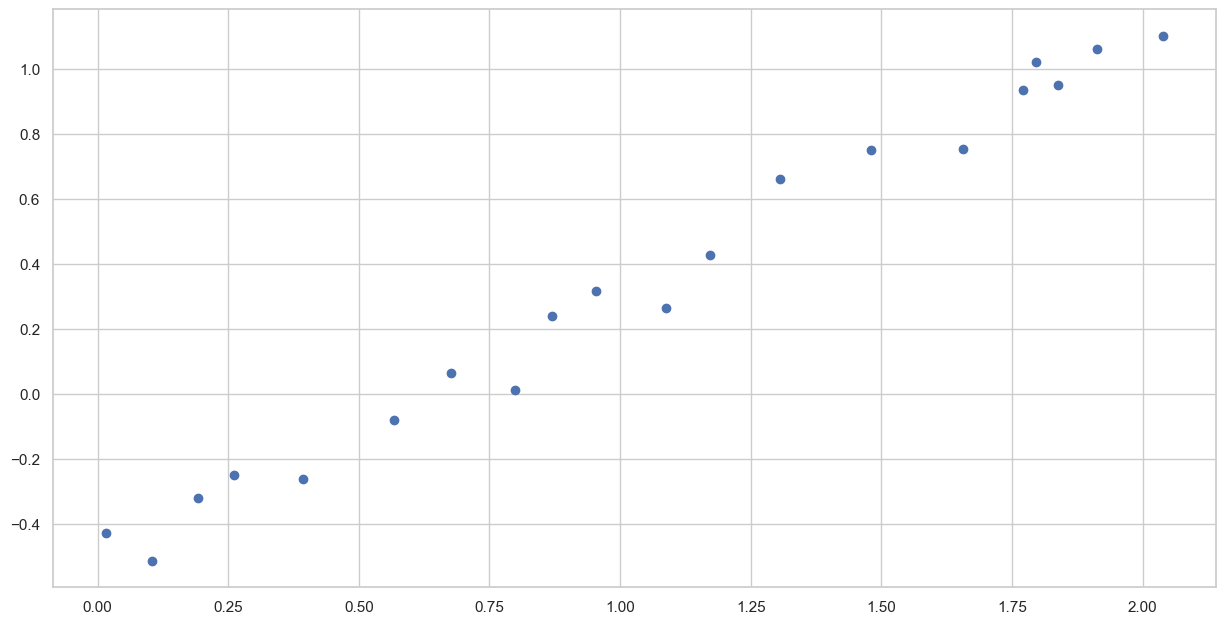

In [5]:
# visualizing the data
plt.figure(figsize = (15, 7.5))
plt.scatter(df["f1"], df["f2"])
plt.show()

In [7]:
# step 1: data standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df)
df

array([[ 1.54535131,  1.45245914],
       [-0.27203872, -0.18355391],
       [ 1.16782713,  1.29657192],
       [-1.46270299, -1.60570434],
       [ 0.6761373 ,  0.78638828],
       [ 1.34947087,  1.37420876],
       [-1.32351276, -1.24217262],
       [ 1.12913003,  1.13352252],
       [ 0.95000678,  0.7936775 ],
       [-0.57106382, -0.51601814],
       [ 0.06851605, -0.13256012],
       [ 0.19697379,  0.17359728],
       [ 0.40492253,  0.61580503],
       [-0.74142803, -0.78689518],
       [-0.14160441, -0.03396865],
       [-1.01204978, -1.12815545],
       [-1.59801963, -1.44282205],
       [ 1.23234064,  1.16652774],
       [-1.21750246, -1.10850974],
       [-0.38075383, -0.61239797]])

In [8]:
# step 2: covariance matrix calculation
covariance_matrix = np.cov(df.T)
covariance_matrix

array([[1.05263158, 1.04455543],
       [1.04455543, 1.05263158]])

In [11]:
# step 3: eigen value decomposition
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
f"Eigen Values = {eigen_values}, Eigen Vectors = {eigen_vectors}"

'Eigen Values = [2.09718701 0.00807615], Eigen Vectors = [[ 0.70710678 -0.70710678]\n [ 0.70710678  0.70710678]]'

In [12]:
# step 4: choosing principal components
explained_variance = eigen_values/ eigen_values.sum()
explained_variance

array([0.99616383, 0.00383617])

In [13]:
threshold = 0.9
number_of_pcs = np.where(explained_variance.cumsum() >= threshold)[0][0] + 1
number_of_pcs

1

In [14]:
# step 5: transformation
from sklearn.decomposition import PCA

pca = PCA(n_components = number_of_pcs)
df_transformed = pca.fit_transform(df)
df_transformed

array([[-2.11977209],
       [ 0.32215263],
       [-1.74259328],
       [ 2.16969163],
       [-1.03416176],
       [-1.92593234],
       [ 1.81421352],
       [-1.59993696],
       [-1.23297098],
       [ 0.76868302],
       [ 0.045286  ],
       [-0.26203332],
       [-0.72176338],
       [ 1.08068771],
       [ 0.1241489 ],
       [ 1.51335363],
       [ 2.15019977],
       [-1.6962561 ],
       [ 1.644739  ],
       [ 0.70226438]])

In [17]:
# explained variance for each principal component
pca.explained_variance_ratio_

array([0.99616383])

# Problems with PCA
PCA is a powerful technique, but it does have some limitations to consider when applying it to the data analysis tasks. The following are the problems,
- Loss of information: By definition, PCA reduces dimensionality, which means some information from the original data is inevitably lost. The challenge lies in finding the right balance between retaining essential information and achieving the desired level of dimensionality reduction.
- Assumes linear relationship: PCA works best when the relationship between features are linear. If the data exhibits significant non-linear patterns, PCA might not capture the underlying structure effectively. In such cases, alternative dimensionality reduction techniques like t-SNE might be more suitable.
- Intrepretability of principal components: While PCA identifies principal components that explain variance, interpreting their meaning can be challenging, especially for datasets with many features. Analyzing the eigen vectors associated with each component can provide some insights, but it might require domain knowledge to fully understand their connection to the real-world problem.
- Sensitivity to outliers: Outliers in the data can significantly influence the principal components identified by PCA. This can distort the representation of the actual data distribution. It's essential to consider outlier treatment methods before applying PCA.
- High dimensional data with few informative features ("curse of dimensionality"): PCA might not be very effective in scenarios where your high-dimensional data has only a few informative features. In such cases, a large portion of the variance might be attributed to noise, making PCA less useful for identifying the underlying structure.